# *Iphone13: EDA and Sentiment Analysis*


### Importing the necessary libraries and modules

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import re
import string

## Reading and exploring the dataset

In [5]:
data = pd.read_csv(r"C:\Users\Twinkle Sahni\Downloads\Running Projects\amazoniphonereviews.csv")
data

,Customer Name,Rating,Headline,Date,Color,Size,Reviews,Product Link
0,Kavya Gupta,1,Do not purchase this I phone,24 September 2021,Starlight,256,This product is duplicate of iPhone 12 only ca...,https://www.amazon.in/Apple-iPhone-13-128GB-St...
1,Kritika Mishra,1,Damaged product received,27 September 2021,Blue,128,There was a hairline scratch on the screen whi...,https://www.amazon.in/Apple-iPhone-13-128GB-St...
2,karthik,1,😂😂😂😂,24 September 2021,RED,512,You should be a bigggggg bot to buy this phone...,https://www.amazon.in/Apple-iPhone-13-128GB-St...
3,Aamish,1,Excellent upgrade in context of being 90k poorer.,25 September 2021,Pink,256,Just but iphone 12!\nIt’s not worth the money!...,https://www.amazon.in/Apple-iPhone-13-128GB-St...
4,Saksham mehta,1,trash af,25 September 2021,Midnight,256,i am poor and i cant afford it lmao xdxdxdxdxd...,https://www.amazon.in/Apple-iPhone-13-128GB-St...
...,...,...,...,...,...,...,...,...
796,EBIN PM,5,Nice one,15 June 2022,Blue,128,NaN,https://www.amazon.in/product-reviews/B09G9BL5...
797,Sai kiran,5,It should be better for low cost for normal pe...,15 June 2022,Blue,128,Awesome mobile I loved it,https://www.amazon.in/product-reviews/B09G9BL5...
798,Abhishek Saini,5,Fantastice,16 June 2022,Blue,128,Amazing delivery speed... No doubt on Apple Pr...,https://www.amazon.in/product-reviews/B09G9BL5...
799,furqan haroon syed,3,missing earphone and charger😅,16 June 2022,Pink,128,overall good product but somewhere price sucks...,https://www.amazon.in/product-reviews/B09G9FPG...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer Name  801 non-null    object
 1   Rating         801 non-null    int64 
 2   Headline       801 non-null    object
 3   Date           801 non-null    object
 4   Color          793 non-null    object
 5   Size           801 non-null    object
 6   Reviews        728 non-null    object
 7   Product Link   793 non-null    object
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


In [7]:
data['Reviews'].values

array(['This product is duplicate of iPhone 12 only camera design changed. Very low quality of this product Buy Samsung mobile phone',
       'There was a hairline scratch on the screen which is not clearly visible directly. When we tried contacting Amazon for the replacement, they asked us to connect to apple and when connected to apple, they asked to connect with Amazon. Blame game begins and we end up paying the price. Awfull service. I am going to tag on the social media both Amazon and apple. Such a big scam',
       'You should be a bigggggg bot to buy this phone\nYou could get iPhone 12 Pro that’s the best 😂',
       'Just but iphone 12!\nIt’s not worth the money!\nUnless ur from BJP or something where you’re full with corrupt money, then go ahead.',
       'i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review while drinking coffee i have my chemistry exam on  manday and cant study mole concept and got b

## Data Pre-processing

In [8]:
data.isnull().any()

Customer Name    False
Rating           False
Headline         False
Date             False
Color             True
Size             False
Reviews           True
Product Link      True
dtype: bool

In [9]:
data.isnull().sum()

Customer Name     0
Rating            0
Headline          0
Date              0
Color             8
Size              0
Reviews          73
Product Link      8
dtype: int64

We have null values in the color, reviews and product link columns. These are all categorical variables for which substituting values using central tendencies will not be really helpful. Moreover, I am particularly interested in the 'reviews' variable for which substituting other user's reviews will not justify the analysis. So I will drop these null values.

In [10]:
data.dropna(inplace=True)
data

,Customer Name,Rating,Headline,Date,Color,Size,Reviews,Product Link
0,Kavya Gupta,1,Do not purchase this I phone,24 September 2021,Starlight,256,This product is duplicate of iPhone 12 only ca...,https://www.amazon.in/Apple-iPhone-13-128GB-St...
1,Kritika Mishra,1,Damaged product received,27 September 2021,Blue,128,There was a hairline scratch on the screen whi...,https://www.amazon.in/Apple-iPhone-13-128GB-St...
2,karthik,1,😂😂😂😂,24 September 2021,RED,512,You should be a bigggggg bot to buy this phone...,https://www.amazon.in/Apple-iPhone-13-128GB-St...
3,Aamish,1,Excellent upgrade in context of being 90k poorer.,25 September 2021,Pink,256,Just but iphone 12!\nIt’s not worth the money!...,https://www.amazon.in/Apple-iPhone-13-128GB-St...
4,Saksham mehta,1,trash af,25 September 2021,Midnight,256,i am poor and i cant afford it lmao xdxdxdxdxd...,https://www.amazon.in/Apple-iPhone-13-128GB-St...
...,...,...,...,...,...,...,...,...
795,Moksh Varshney,5,Camera,12 June 2022,Pink,128,The phone is very nice looking and battery bac...,https://www.amazon.in/product-reviews/B09G9FPG...
797,Sai kiran,5,It should be better for low cost for normal pe...,15 June 2022,Blue,128,Awesome mobile I loved it,https://www.amazon.in/product-reviews/B09G9BL5...
798,Abhishek Saini,5,Fantastice,16 June 2022,Blue,128,Amazing delivery speed... No doubt on Apple Pr...,https://www.amazon.in/product-reviews/B09G9BL5...
799,furqan haroon syed,3,missing earphone and charger😅,16 June 2022,Pink,128,overall good product but somewhere price sucks...,https://www.amazon.in/product-reviews/B09G9FPG...


## Explanatory Data Analysis

In this section, we'll look at certain insights from the data concerning the features of the Iphone13.

In [13]:
data.describe

<bound method NDFrame.describe of                   Customer Name  Rating  \
0                   Kavya Gupta       1   
1                Kritika Mishra       1   
2                       karthik       1   
3                        Aamish       1   
4                 Saksham mehta       1   
..                          ...     ...   
795              Moksh Varshney       5   
797                   Sai kiran       5   
798              Abhishek Saini       5   
799          furqan haroon syed       3   
800  Mokkapati V S K M Srinivas       5   

                                              Headline               Date  \
0                         Do not purchase this I phone  24 September 2021   
1                             Damaged product received  27 September 2021   
2                                                 😂😂😂😂  24 September 2021   
3    Excellent upgrade in context of being 90k poorer.  25 September 2021   
4                                             trash af  25 Septe

**Let's explore the year and months having most number of reviews..**

In [14]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Customer Name            object
Rating                    int64
Headline                 object
Date             datetime64[ns]
Color                    object
Size                     object
Reviews                  object
Product Link             object
dtype: object

In [15]:
data['Year'] = data['Date'].dt.year
data.Year.value_counts()

2022    604
2021    118
Name: Year, dtype: int64

In [16]:
data['Month'] = data['Date'].dt.month
data.Month.value_counts().sort_index()

1      42
2      86
3      98
4      90
5     205
6      83
9      40
10     25
11     32
12     21
Name: Month, dtype: int64

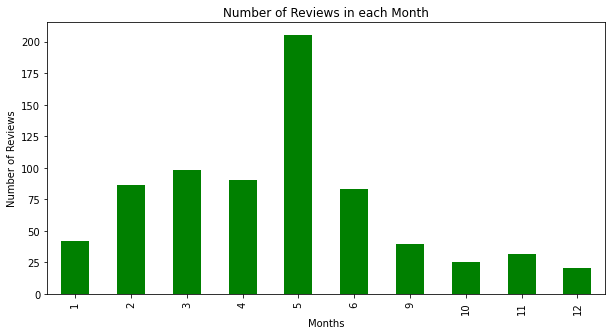

In [17]:
ax = data['Month'].value_counts().sort_index()\
.plot(kind='bar', 
      title= 'Number of Reviews in each Month', 
      figsize = (10,5),
      color = 'Green')
ax.set_xlabel("Months")
ax.set_ylabel("Number of Reviews")
plt.show()

### Data Visualization

In [18]:
ax = data['Rating'].value_counts().sort_index()
ax

1     98
2     15
3     25
4     78
5    506
Name: Rating, dtype: int64

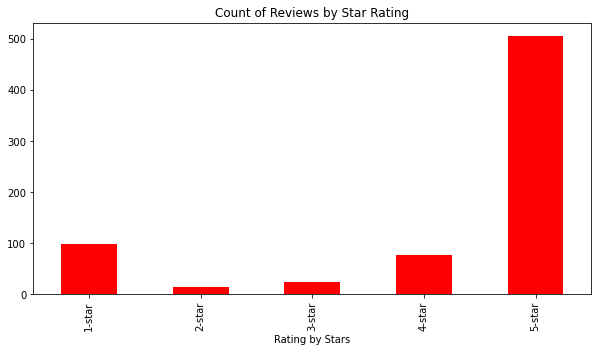

In [19]:
ax = data['Rating'].value_counts().sort_index()\
.plot(kind='bar', 
      title= 'Count of Reviews by Star Rating',  
      figsize = (10,5),
      color = 'Red')
ax.set_xlabel("Rating by Stars")
ax.set_xticklabels(['1-star', '2-star', '3-star', '4-star', '5-star'])
plt.show()

# Sentiment Analysis

Taking the Subset of the data since we need only Reviews column for further analysis.

In [21]:
df = pd.read_csv(r"C:\Users\Twinkle Sahni\Downloads\Running Projects\Book2.txt", delimiter='\n')
df

,Reviews
0,This product is duplicate of iPhone 12 only ca...
1,There was a hairline scratch on the screen whi...
2,You should be a bigggggg bot to buy this phone...
3,Just but iphone 12!\nIt?s not worth the money!...
4,i am poor and i cant afford it lmao xdxdxdxdxd...
...,...
723,The phone is very nice looking and battery bac...
724,Awesome mobile I loved it
725,Amazing delivery speed... No doubt on Apple Pr...
726,overall good product but somewhere price sucks...


In [22]:
df.isnull().sum()

Reviews    0
dtype: int64

In [23]:
df.values

array([['This product is duplicate of iPhone 12 only camera design changed. Very low quality of this product Buy Samsung mobile phone'],
       ['There was a hairline scratch on the screen which is not clearly visible directly. When we tried contacting Amazon for the replacement, they asked us to connect to apple and when connected to apple, they asked to connect with Amazon. Blame game begins and we end up paying the price. Awfull service. I am going to tag on the social media both Amazon and apple. Such a big scam'],
       ['You should be a bigggggg bot to buy this phone\nYou could get iPhone 12 Pro that?s the best ??'],
       ['Just but iphone 12!\nIt?s not worth the money!\nUnless ur from BJP or something where you?re full with corrupt money, then go ahead.'],
       ['i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review while drinking coffee i have my chemistry exam on  manday and cant study mole concept

## Cleaning the text

In [24]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import re
import string

In [25]:
# Define a function to clean the text
def clean(text):
    text = str(text).lower() #Converts the text into lowercase
    text = re.sub('[^A-Za-z]+', ' ', text)  #Removes all special characters and numericals leaving the alphabets
    return text
    

# Cleaning the text in the review column
df['Reviews'] = df['Reviews'].apply(clean)
df.Reviews

0      this product is duplicate of iphone only camer...
1      there was a hairline scratch on the screen whi...
2      you should be a bigggggg bot to buy this phone...
3      just but iphone it s not worth the money unles...
4      i am poor and i cant afford it lmao xdxdxdxdxd...
                             ...                        
723    the phone is very nice looking and battery bac...
724                            awesome mobile i loved it
725    amazing delivery speed no doubt on apple produ...
726    overall good product but somewhere price sucks...
727                                 iphone iphone anthey
Name: Reviews, Length: 728, dtype: object

## Tokenization

In [26]:
from nltk import word_tokenize
df['Tokenized_Reviews'] = df['Reviews'].apply(word_tokenize)
df.Tokenized_Reviews

0      [this, product, is, duplicate, of, iphone, onl...
1      [there, was, a, hairline, scratch, on, the, sc...
2      [you, should, be, a, bigggggg, bot, to, buy, t...
3      [just, but, iphone, it, s, not, worth, the, mo...
4      [i, am, poor, and, i, cant, afford, it, lmao, ...
                             ...                        
723    [the, phone, is, very, nice, looking, and, bat...
724                      [awesome, mobile, i, loved, it]
725    [amazing, delivery, speed, no, doubt, on, appl...
726    [overall, good, product, but, somewhere, price...
727                             [iphone, iphone, anthey]
Name: Tokenized_Reviews, Length: 728, dtype: object

## StopWords

In [27]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
print(stopwords)

{'o', "you've", 'from', 'all', 'of', 'now', 'too', 'should', 'against', 'aren', 'was', 'just', 'isn', 'her', 'has', 'if', 'don', 'couldn', 'as', 'hers', 'that', 'at', 'this', 'wouldn', 'not', 'did', 'for', 'who', 'will', 'are', 'other', 'hasn', "you're", "couldn't", 'in', 'having', 'before', 'yourself', 'we', "mightn't", 'yourselves', 'on', "don't", 'mustn', 'then', 'd', 'below', 'through', 'y', 've', "wouldn't", 'few', "hasn't", "aren't", 'mightn', 'been', 'down', 'some', 'myself', "shan't", 'herself', 'ours', 'once', 'is', "should've", 'wasn', 'each', 'them', 'i', "hadn't", 'do', 'because', 'his', 'theirs', 'have', "weren't", 'haven', 'shouldn', 'where', 'both', 'what', 'himself', 'does', "you'd", 'm', 'an', 'or', 'shan', "it's", 'about', 'it', 'had', 'any', 'yours', 'and', 'while', "she's", 'more', 'to', 'by', 'most', 'with', 'between', "mustn't", 'off', "won't", 'itself', "didn't", 'than', 'no', 'very', 's', "doesn't", 'when', 'over', 'hadn', 'nor', 'ma', 'out', 'only', 'the', 'but

In [28]:
def stopword(text):
    text = [word for word in text if word not in stopwords]
    text =" ".join(text)
    return text

df['Tokenized_Reviews'] = df['Tokenized_Reviews'].apply(stopword)
df.Tokenized_Reviews

0      product duplicate iphone camera design changed...
1      hairline scratch screen clearly visible direct...
2       bigggggg bot buy phone could get iphone pro best
3      iphone worth money unless ur bjp something ful...
4      poor cant afford lmao xdxdxdxdxd money flex bu...
                             ...                        
723    phone nice looking battery backup satisfying n...
724                                 awesome mobile loved
725    amazing delivery speed doubt apple products su...
726    overall good product somewhere price sucks rea...
727                                 iphone iphone anthey
Name: Tokenized_Reviews, Length: 728, dtype: object

## Stemming

In [29]:
stemmer = nltk.SnowballStemmer('english')

def stemming(text):
    text = [stemmer.stem(word) for word in text]
    text ="".join(text)
    return text

df['Stemmed_Reviews'] = df['Tokenized_Reviews'].apply(stemming)
df.Stemmed_Reviews

0      product duplicate iphone camera design changed...
1      hairline scratch screen clearly visible direct...
2       bigggggg bot buy phone could get iphone pro best
3      iphone worth money unless ur bjp something ful...
4      poor cant afford lmao xdxdxdxdxd money flex bu...
                             ...                        
723    phone nice looking battery backup satisfying n...
724                                 awesome mobile loved
725    amazing delivery speed doubt apple products su...
726    overall good product somewhere price sucks rea...
727                                 iphone iphone anthey
Name: Stemmed_Reviews, Length: 728, dtype: object

## Lemmantizing

In [30]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmantizing(text):
    text = [lemmatizer.lemmatize(word) for word in text]
    text ="".join(text)
    return text

df['Lemmantized_Reviews'] = df['Tokenized_Reviews'].apply(lemmantizing)
df.Lemmantized_Reviews

0      product duplicate iphone camera design changed...
1      hairline scratch screen clearly visible direct...
2       bigggggg bot buy phone could get iphone pro best
3      iphone worth money unless ur bjp something ful...
4      poor cant afford lmao xdxdxdxdxd money flex bu...
                             ...                        
723    phone nice looking battery backup satisfying n...
724                                 awesome mobile loved
725    amazing delivery speed doubt apple products su...
726    overall good product somewhere price sucks rea...
727                                 iphone iphone anthey
Name: Lemmantized_Reviews, Length: 728, dtype: object

## VADER Model

In [31]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df['Lemmantized_Reviews']]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df['Lemmantized_Reviews']]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df['Lemmantized_Reviews']]

data = df[['Reviews', 'Positive', 'Neutral', 'Negative']]
data

[nltk_data] Downloading package vader_lexicon to C:\Users\Twinkle
[nltk_data]     Sahni\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Reviews,Positive,Neutral,Negative
0,this product is duplicate of iphone only camer...,0.000,0.851,0.149
1,there was a hairline scratch on the screen whi...,0.182,0.676,0.142
2,you should be a bigggggg bot to buy this phone...,0.344,0.656,0.000
3,just but iphone it s not worth the money unles...,0.147,0.853,0.000
4,i am poor and i cant afford it lmao xdxdxdxdxd...,0.061,0.652,0.287
...,...,...,...,...
723,the phone is very nice looking and battery bac...,0.553,0.447,0.000
724,awesome mobile i loved it,0.889,0.111,0.000
725,amazing delivery speed no doubt on apple produ...,0.507,0.329,0.164
726,overall good product but somewhere price sucks...,0.102,0.702,0.196


#### The Overall Sentiment of the Iphone Reviews

In [32]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative ")
    else:
        print("Neutral")
sentiment_score(x, y, z)

Neutral


#### Sentiment Score of each category

In [33]:
print("Positive: ", round(x,2))
print("Negative: ", round(y,2))
print("Neutral: ", round(z,2))

Positive:  311.37
Negative:  33.74
Neutral:  380.91
